In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


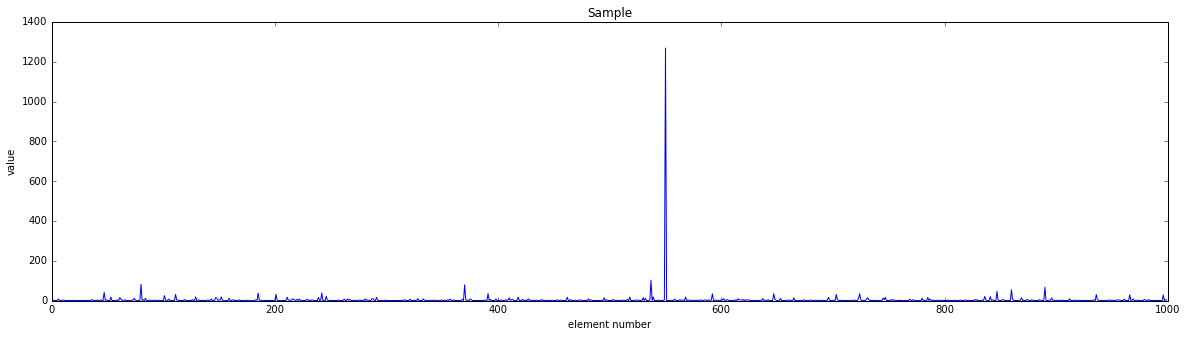

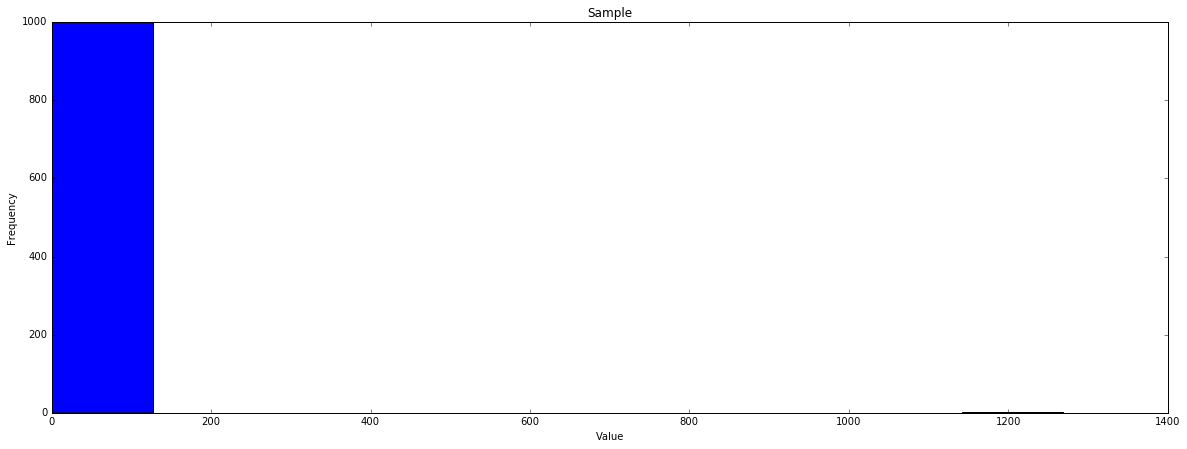

In [3]:
pareto_sample = []
f = open('70.txt')
line = f.readline()
while line:
    pareto_sample.append(float(line)),
    line = f.readline()
f.close()

plt.figure(figsize=(20,5))
plt.plot(range(len(pareto_sample)),pareto_sample)
plt.xlabel("element number")
plt.ylabel("value")
plt.title("Sample")
plt.show()

plt.figure(figsize=(20,7))
plt.hist(pareto_sample)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Sample")
fig = plt.gcf()

Плотность распределения Парето равна:

$p(x) = \frac{\alpha}{x^{\alpha + 1}} \cdot I\{x > 1\}$,  

$F(x) = 1 - x^{-\alpha}$

$E\xi = \alpha \cdot (\alpha - 1)^{-1}$

$D\xi = \frac{\alpha}{(\alpha - 1)^2 \cdot (\alpha - 2)}$


$\hat{\alpha} = \bar{X}(\bar{X} - 1)^{-1}$ 

В статье M. Rytgaard, Estimation in the Pareto  Distribution,1990 

доказано, что оценка $\alpha$ методом моментов ассимптотически нормальна распределена  с параметрами: $N(\alpha, \frac{\alpha^2}{n} + \frac{\alpha}{n \cdot (\alpha - 2)})$ при $\alpha > 2$ 

Рассмотрим оценку метода моментов для нашей выборки

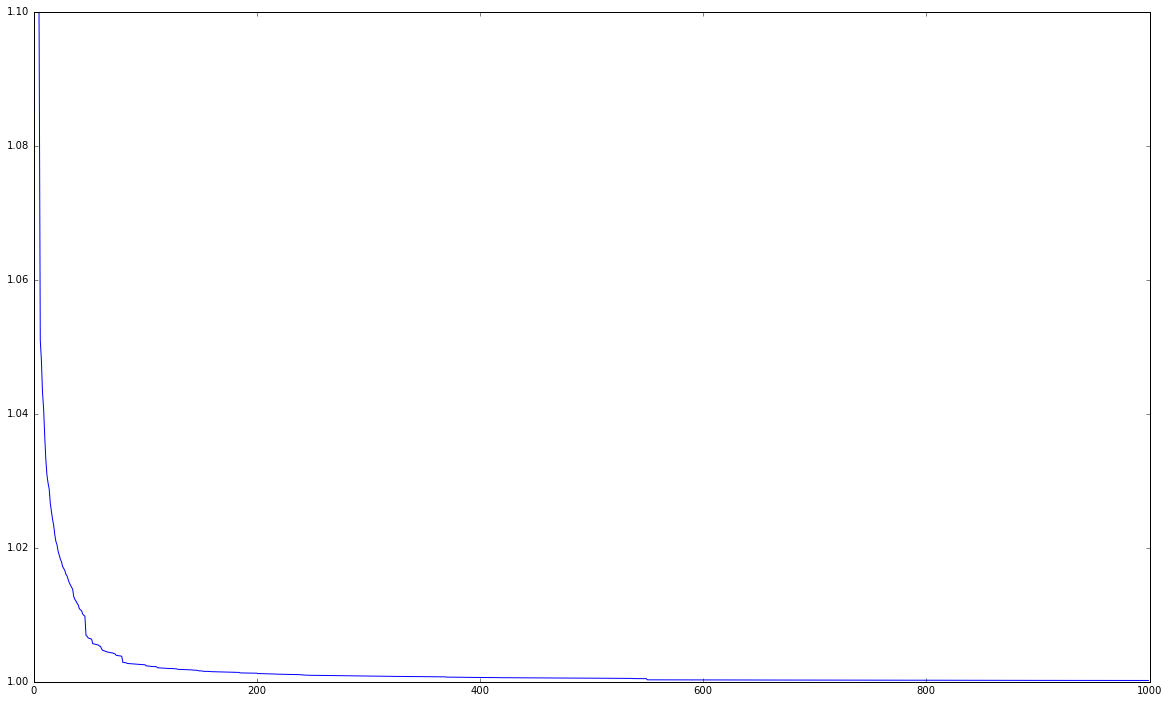

In [4]:
sums  = np.cumsum(pareto_sample)

MOM = [sums[i] * (sums[i] - 1) ** (-1) for i in range(len(sums))]

plt.figure(figsize=(20,12))
plt.plot(range(0,len(MOM)), MOM)
plt.ylim((1,1.1))
plt.show()


Следовательно для нашей выборки теорема не применима. 

Оценка метода максимального правдоподобия для $\alpha$:

$\alpha = n\cdot(\Sigma^{n}_{i = 0}\ln(x_i) )^{-1}$

В другой статье: E. L. Lehmann, Theory of point estimation, J. Wiley, New York, 1983

доказано, что данная оценка ассимптотически распределена как $N(\alpha, [I(\alpha)]^{-1})$

где $I(\alpha) = - E(\frac{\partial^2 \ln{f(X, \alpha)}}{\partial \alpha^2}) = \frac{n}{\alpha^2}$ - информация Фишера

$\Rightarrow \hat{\alpha} \sim N(\alpha,  \frac{n}{\alpha^2}),$   $n \to \infty$

Откуда получим $[\hat\alpha - z_{\frac{\gamma}{2}} \cdot \frac{\hat{\alpha}}{\sqrt{n}}, \hat\alpha + z_{\frac{\gamma}{2}} \cdot \frac{\hat{\alpha}}{\sqrt{n}}]$

Отрисуем для $\gamma = 0.1$

(990,)


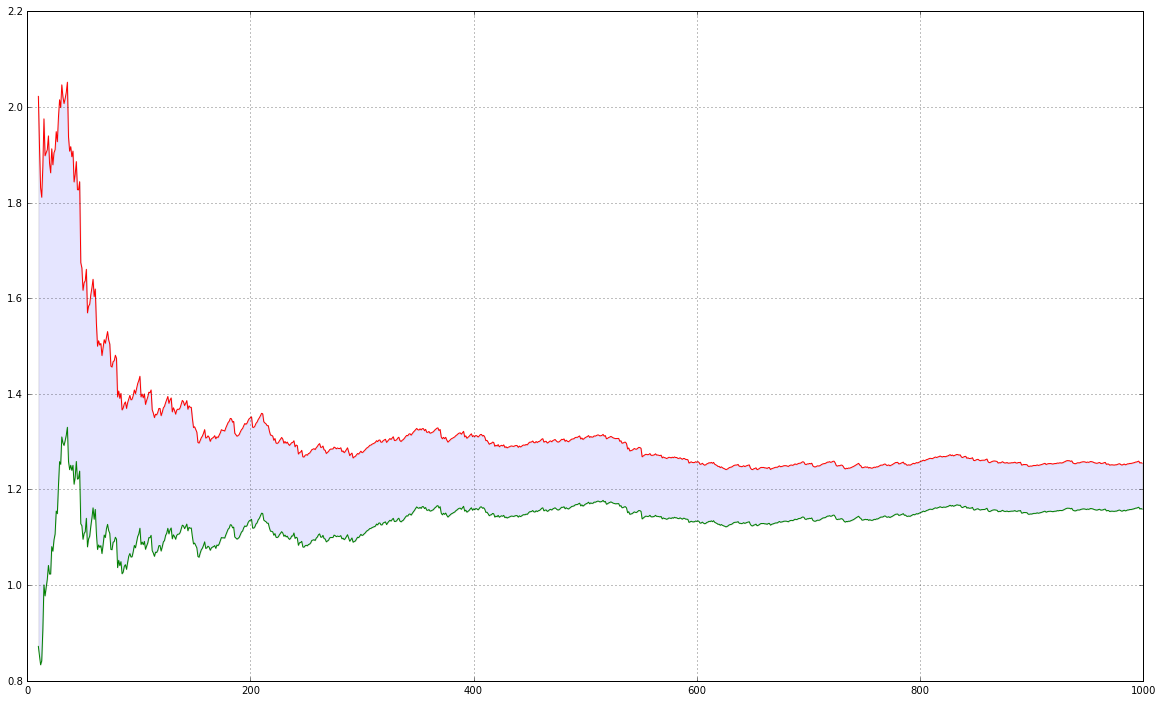

In [5]:
gamma = 0.5
def estimation(X):
    return (len(X)) * np.sum([np.log(X[i]) for i in range(len(X))])**(-1)

def interval(X):
    est = estimation(X)
    quant = sps.mstats.mquantiles(X,[gamma / 2])
    return (est - quant * est/(len(X)**(1/2)), est + quant * est/(len(X)**(1/2)))

plt.figure(figsize=(20, 12))
plt.grid(True)

bounds = [[],[]]
X_array = range(10,len(pareto_sample)) 
for i in X_array:
    (a,b) = interval(pareto_sample[:i])
    bounds[0].append(a[0])
    bounds[1].append(b[0])
plt.plot(X_array, bounds[0],c='g')
plt.plot(X_array, bounds[1], c='r')
print(np.array(bounds[0]).shape)
plt.fill_between(np.array(X_array),
                 np.array(bounds[0]),np.array(bounds[1]),
                alpha = 0.1)
plt.show()

Построенные интервалы являются ассимптотическими доверительными интервалами, что соответствует изображению, получившемуся а графике(действительно, интервал приближается к константным значениям границ)